<a href="https://colab.research.google.com/github/nyleashraf/NYPD-Stop-and-Frisk/blob/master/cs329eProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### New York City Stop and Frisk Program
Project members: 
Anna Williams, Zizhuo (Xavier) Dong, Nyle Ashraf, Alexandra Smith

This data is collected from New York City 
[Link to dataset](https://public.enigma.com/browse/tag/policing/101)



#### **Import the data and combine all years 2003-2012 in one dataframe**

In [0]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import time
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data1 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2003.csv')
data2 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2005.csv')
data3 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2006.csv')
data4 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2009.csv')
data5 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2010.csv')
data6 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2011.csv')
data7 = pd.read_csv('/content/drive/My Drive/Final Project/NYPD_SF_2012.csv')

In [0]:
print("Shape of 2003 dataset: ", data1.shape)
print("Shape of 2005 dataset: ", data2.shape)
print("Shape of 2006 dataset: ", data3.shape)
print("Shape of 2009 dataset: ", data4.shape)
print("Shape of 2010 dataset: ", data5.shape)
print("Shape of 2011 dataset: ", data6.shape)
print("Shape of 2012 dataset: ", data7.shape)

Shape of 2003 dataset:  (160851, 113)
Shape of 2005 dataset:  (398191, 113)
Shape of 2006 dataset:  (506491, 114)
Shape of 2009 dataset:  (581168, 113)
Shape of 2010 dataset:  (601285, 113)
Shape of 2011 dataset:  (685724, 114)
Shape of 2012 dataset:  (532911, 114)


**Some datasets include 113 features, while others include 114 features. In order to easily merge the datasets into one dataframe, we will need to identify the common features and merge only those features.**

In [0]:
from functools import reduce
features1 = data1.columns.get_values()
features2 = data2.columns.get_values()
features3 = data3.columns.get_values()
features4 = data4.columns.get_values()
features5 = data5.columns.get_values()
features6 = data6.columns.get_values()
features7 = data7.columns.get_values()
common_features = reduce(np.intersect1d, (features1, features2, features3, features4, features5, features6, features7))
print(common_features)
print("Number of common features: ", common_features.size)

['ac_assoc' 'ac_cgdir' 'ac_evasv' 'ac_incid' 'ac_inves' 'ac_other'
 'ac_proxm' 'ac_rept' 'ac_stsnd' 'ac_time' 'addrnum' 'addrpct' 'addrtyp'
 'adtlrept' 'age' 'aptnum' 'arstmade' 'arstoffn' 'asltweap' 'beat' 'build'
 'city' 'comppct' 'compyear' 'contrabn' 'crimsusp' 'crossst' 'cs_bulge'
 'cs_casng' 'cs_cloth' 'cs_descr' 'cs_drgtr' 'cs_furtv' 'cs_lkout'
 'cs_objcs' 'cs_other' 'cs_vcrim' 'datestop' 'dob' 'explnstp' 'eyecolor'
 'frisked' 'haircolr' 'ht_feet' 'ht_inch' 'inout' 'knifcuti' 'machgun'
 'officrid' 'offshld' 'offunif' 'offverb' 'othfeatr' 'othpers' 'othrweap'
 'pct' 'perobs' 'perstop' 'pf_baton' 'pf_drwep' 'pf_grnd' 'pf_hands'
 'pf_hcuff' 'pf_other' 'pf_pepsp' 'pf_ptwep' 'pf_wall' 'pistol' 'post'
 'premname' 'premtype' 'race' 'radio' 'recstat' 'repcmd' 'rescode'
 'revcmd' 'rf_attir' 'rf_bulg' 'rf_furt' 'rf_knowl' 'rf_othsw' 'rf_rfcmp'
 'rf_vcact' 'rf_vcrim' 'rf_verbl' 'riflshot' 'sb_admis' 'sb_hdobj'
 'sb_other' 'sb_outln' 'searched' 'sector' 'ser_num' 'serialid' 'sex'
 'state' '

In [0]:
datasets = [data1, data2, data3, data4, data5, data6, data7]
for dataset in datasets:
    dataset = dataset[common_features]

**Although we have removed the non-common features from the data for each year, we are still not ready to append the individual dataframes into one larger dataframe. The ordering of columns in each dataframe needs to be consistent before we bring them together.**

In [0]:
columns = data1.columns.tolist()
for dataframe in datasets: 
    dataframe = dataframe.loc[:, columns]

In [0]:
for dataset in datasets: 
    counter = 0
    if dataset.columns[counter] != columns[counter]:
        raise Exception("Column ordering not consistent.")
    else:
        counter += 1
print("All datasets consistent with our ordering.")

All datasets consistent with our ordering.


In [0]:
dataframe = pd.concat(datasets, ignore_index = True)
dataframe = dataframe.loc[:, columns]
print("Shape of combined dataframe: ", dataframe.shape)
dataframe.head()

Shape of combined dataframe:  (3466621, 113)


,x,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,...,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,serialid
0,10500,2003,108.0,168.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,10.0,ASSAULT,15.0,P,Y,Y,N,NaN,N,NaN,0.0,0.0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,170,170,N,N,NaN,NaN,M,Q,1958-07-12T00:00:00,44.0,5.0,8.0,280.0,BK,BR,H,NaN,L,NaN,NaN,STREET,33 ST,QEENS BLVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10501
1,10501,2003,107.0,230.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,5.0,BURGLARY,5.0,P,Y,Y,Y,NaN,N,NaN,0.0,0.0,Y,NaN,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,...,N,107,107,N,Y,NaN,NaN,M,Q,1970-09-09T00:00:00,32.0,5.0,9.0,230.0,XX,XX,H,NaN,L,NaN,NaN,STREET,NaN,AVON,GCP SVC RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10502
2,8341,2003,33.0,162.0,2003-01-18T00:00:00,00:02,NaN,O,NaN,1.0,GUN RUN,3.0,P,Y,N,N,NaN,N,NaN,0.0,0.0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,033,033,N,N,V,S,M,W,1972-08-01T00:00:00,30.0,5.0,10.0,180.0,BR,BK,M,NaN,L,NaN,NaN,STREET,NaN,F/O 560,W175ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8342
3,9812,2003,70.0,189.0,2003-01-21T00:00:00,21:10,NaN,O,NaN,2.0,CSCS,1.0,V,Y,N,N,NaN,N,NaN,0.0,0.0,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,290,290,N,N,V,NaN,M,B,1900-12-31T00:00:00,0.0,5.0,8.0,140.0,XX,XX,Z,NaN,L,NaN,NaN,NaN,33,CRUOKE,F/O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9812
4,7455,2003,114.0,125.0,2003-01-16T00:00:00,15:15,NaN,O,NaN,1.0,ROBBERY,10.0,P,Y,Y,N,NaN,N,NaN,0.0,0.0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,582,497,N,N,NaN,NaN,M,B,1988-02-13T00:00:00,13.0,5.0,10.0,160.0,BK,BR,M,NaN,L,NaN,NaN,STREET,40,ROAD,29 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7455


### **Data Exploration**

During this segement, we explore the distribution of our data. We want to find: 
- Significant or notable values
- Outliers/Noise 
- NaN enumeration 

Now that we have built one dataframe with all of our data points, we can begin feature engineering by: (1) creating new, useful features from those that currently exist, and (2) removing features that are either not useful or contain excessive null values.

#### **Null values and Datatypes**

In [0]:
dataframe_expl = dataframe.copy()
dataframe.dtypes

x             int64
year          int64
pct         float64
ser_num     float64
datestop     object
             ...   
ycoord      float64
dettypcm     object
linecm      float64
detailcm    float64
serialid      int64
Length: 113, dtype: object

In [0]:
print('Total number of null values', dataframe_expl.isnull().values.sum())

Total number of null values 52772347


In [0]:
# The records that have no null values
# may not be useful
no_nas= (dataframe_expl.loc[:,dataframe_expl.isnull().sum() == 0])
print(no_nas.shape)
no_nas

(3466621, 60)


,x,year,explnstp,othpers,arstmade,sumissue,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,serialid
0,10500,2003,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,10501
1,10501,2003,Y,Y,Y,N,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,Y,10502
2,8341,2003,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,8342
3,9812,2003,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,9812
4,7455,2003,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,7455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466616,46252,2012,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,46252
3466617,46253,2012,Y,N,N,N,Y,Y,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,N,N,Y,Y,Y,N,N,Y,N,N,N,Y,N,46253
3466618,46254,2012,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,46254
3466619,46949,2012,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,46949


In [0]:
print('General information about the data frame')
dataframe_expl.info()

General information about the data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466621 entries, 0 to 3466620
Columns: 113 entries, x to serialid
dtypes: float64(18), int64(3), object(92)
memory usage: 2.9+ GB


In [0]:
# Dataframe of all columns with atleast one null value.
columns_with_nulls = dataframe_expl.loc[:,dataframe_expl.isnull().any()]
columns_with_nulls

,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,arstoffn,sumoffen,compyear,comppct,offunif,officrid,repcmd,revcmd,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,108.0,168.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,10.0,ASSAULT,15.0,P,NaN,NaN,0.0,0.0,Y,NaN,170,170,NaN,NaN,M,Q,1958-07-12T00:00:00,44.0,5.0,8.0,280.0,BK,BR,H,NaN,L,NaN,NaN,STREET,33 ST,QEENS BLVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.0,230.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,5.0,BURGLARY,5.0,P,NaN,NaN,0.0,0.0,Y,NaN,107,107,NaN,NaN,M,Q,1970-09-09T00:00:00,32.0,5.0,9.0,230.0,XX,XX,H,NaN,L,NaN,NaN,STREET,NaN,AVON,GCP SVC RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.0,162.0,2003-01-18T00:00:00,00:02,NaN,O,NaN,1.0,GUN RUN,3.0,P,NaN,NaN,0.0,0.0,N,NaN,033,033,V,S,M,W,1972-08-01T00:00:00,30.0,5.0,10.0,180.0,BR,BK,M,NaN,L,NaN,NaN,STREET,NaN,F/O 560,W175ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70.0,189.0,2003-01-21T00:00:00,21:10,NaN,O,NaN,2.0,CSCS,1.0,V,NaN,NaN,0.0,0.0,N,NaN,290,290,V,NaN,M,B,1900-12-31T00:00:00,0.0,5.0,8.0,140.0,XX,XX,Z,NaN,L,NaN,NaN,NaN,33,CRUOKE,F/O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114.0,125.0,2003-01-16T00:00:00,15:15,NaN,O,NaN,1.0,ROBBERY,10.0,P,NaN,NaN,0.0,0.0,Y,NaN,582,497,NaN,NaN,M,B,1988-02-13T00:00:00,13.0,5.0,10.0,160.0,BK,BR,M,NaN,L,NaN,NaN,STREET,40,ROAD,29 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466616,48.0,474.0,2012-01-22T00:00:00,119,A,O,P,1.0,ROBBERY,2.0,V,NaN,NaN,0.0,0.0,Y,NaN,48,48,NaN,NaN,F,P,1900-12-31T00:00:00,20.0,5.0,6.0,150.0,BR,BR,M,NaN,R,NaN,NaN,SIDEWALK,NaN,NaN,DALY AVENUE,EAST 181 STREET,NaN,BRONX,NaN,NaN,48.0,E,*,NaN,1017155.0,247299.0,CM,1.0,85.0
3466617,1.0,221.0,2012-01-22T00:00:00,119,A,O,P,1.0,GRAND LARCENY,5.0,V,NaN,NaN,0.0,0.0,Y,NaN,1,1,NaN,NaN,M,B,1960-12-13T00:00:00,52.0,5.0,8.0,140.0,BK,BR,T,NaN,R,NaN,NaN,NaN,NaN,NaN,AVENUE OF THE AMERICAS,DOMINICK STREET,NaN,MANHATTAN,NaN,NaN,1.0,I,NaN,NaN,982962.0,203381.0,CM,1.0,45.0
3466618,42.0,573.0,2012-01-22T00:00:00,120,A,O,P,30.0,GLA,5.0,P,NaN,NaN,0.0,0.0,N,NaN,42,42,V,S,M,B,1960-04-21T00:00:00,51.0,6.0,0.0,180.0,BK,BR,M,NaN,R,NaN,NaN,PUBLIC STREET,NaN,NaN,EAST 174 STREET,BOSTON ROAD,NaN,BRONX,NaN,NaN,42.0,D,NaN,NaN,NaN,NaN,CM,1.0,46.0
3466619,44.0,1351.0,2012-01-22T00:00:00,1545,A,O,P,5.0,ROBBERY,5.0,V,NaN,NaN,0.0,0.0,Y,NaN,163,44,NaN,NaN,M,B,1979-03-17T00:00:00,32.0,5.0,9.0,175.0,BK,BR,Z,NaN,R,NaN,NaN,SIDEWALK,NaN,NaN,GRAND CONCOURSE,EAST 167 STREET,NaN,BRONX,NaN,NaN,44.0,F,NaN,NaN,1007022.0,243322.0,CM,1.0,85.0


#### **Distribution of the data by race and build**

In [0]:
print('All possible values in race column', dataframe_expl['race'].unique())

All possible values in race column ['Q' 'W' 'B' 'P' 'A' 'Z' 'I' nan 'X' 'U']


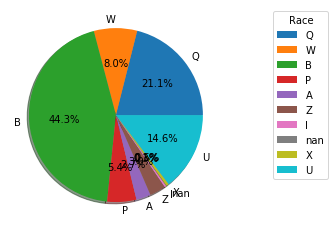

In [0]:
fig3, ax3 = plt.subplots()
labels = list(dataframe['race'].unique())
num_Q=dataframe['race'].value_counts()['Q']
num_W=dataframe['race'].value_counts()['W']
num_B=dataframe['race'].value_counts()['B']
num_P=dataframe['race'].value_counts()['P']
num_A=dataframe['race'].value_counts()['A']
num_Z=dataframe['race'].value_counts()['Z']
num_I=dataframe['race'].value_counts()['I']
num_X=dataframe['race'].value_counts()['X']
num_U=dataframe['race'].value_counts()['U']
num_na=dataframe['sex'].isna().sum()
sizes = [num_Q, num_W,num_B,num_P,num_A,num_Z,num_I,num_X,num_U,num_na]
wedges, texts, autotexts=ax3.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True)
ax3.legend(wedges, labels, title='Race', loc="upper right", bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [0]:

dataframe_expl['build'].replace({'H': 'HEAVY', 'M': 'MEDIUM', 'T': 'THIN', 'U': 'MUSCULAR', 'Z': 'UNKNOWN'}, inplace=True)
dataframe_expl['build'].unique()

array(['HEAVY', 'MEDIUM', 'UNKNOWN', 'THIN', 'MUSCULAR', nan],
      dtype=object)

#### **Distribution of records by Month**
##### **Note that this by all months between 2003-2012**

In [0]:
values = dataframe_expl['datestop'].map(lambda x: x[5:7], na_action='ignore')
dataframe_expl.insert(5, 'month', values, allow_duplicates=True)

In [0]:
print(dataframe_expl.shape)

months = ['01', '02', '03','04', '05','06','07','08','09','10','11','12']

(3466621, 114)


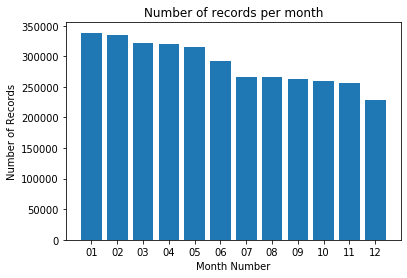

In [0]:
fig2, ax2 = plt.subplots()

plt.ylabel('Number of Records')
plt.xlabel('Month Number')
plt.title('Number of records per month')
ax2 = plt.bar(months, dataframe_expl['month'].value_counts())

#### **Distribution of the data by Frisked and Searched**

In [0]:
frisked=dataframe['frisked'].value_counts()
searched=dataframe['searched'].value_counts()

In [0]:
# Generate a stacked bar chart of Frisked and Searched Columns
race_select = dataframe.loc[dataframe['race']=='B']
race_select_c = dataframe.loc[dataframe['race']!='B']

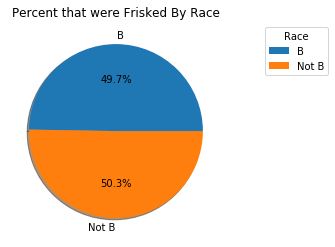

In [0]:
# Districbution of Frisked == Y and Searched == Y of Race == 'B' and 
# Race != 'B'

fig5, ax5 = plt.subplots()
labels = ['B', 'Not B']
num_frisked_B = race_select['frisked'].value_counts()[1]
num_frisked_not_B=race_select_c['frisked'].value_counts()[1]
sizes = [num_frisked_B, num_frisked_not_B]
wedges, texts, autotexts=ax5.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True)
ax5.legend(wedges, labels, title='Race', loc="upper right", bbox_to_anchor=(1,0,0.5,1))
plt.title('Percent that were Frisked By Race')
plt.show()

In [0]:
frisked

Y      1588217
N      1371913
NO      289312
YES     217179
Name: frisked, dtype: int64

In [0]:
searched

N      2707037
NO      472275
Y       253093
YES      34216
Name: searched, dtype: int64

### **Data Cleaning**

*Convert height to inches*

In [0]:
#convert height to inches
dataframe['height'] = 12 * dataframe['ht_feet'] + dataframe['ht_inch']
dataframe.drop(['ht_feet', 'ht_inch'], axis=1, inplace=True)
dataframe.head()

,x,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,...,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,serialid,height
0,10500,2003,108.0,168.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,10.0,ASSAULT,15.0,P,Y,Y,N,NaN,N,NaN,0.0,0.0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,170,170,N,N,NaN,NaN,M,Q,1958-07-12T00:00:00,44.0,280.0,BK,BR,H,NaN,L,NaN,NaN,STREET,33 ST,QEENS BLVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10501,68.0
1,10501,2003,107.0,230.0,2003-01-23T00:00:00,12:10,NaN,O,NaN,5.0,BURGLARY,5.0,P,Y,Y,Y,NaN,N,NaN,0.0,0.0,Y,NaN,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,...,N,N,107,107,N,Y,NaN,NaN,M,Q,1970-09-09T00:00:00,32.0,230.0,XX,XX,H,NaN,L,NaN,NaN,STREET,NaN,AVON,GCP SVC RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10502,69.0
2,8341,2003,33.0,162.0,2003-01-18T00:00:00,00:02,NaN,O,NaN,1.0,GUN RUN,3.0,P,Y,N,N,NaN,N,NaN,0.0,0.0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,033,033,N,N,V,S,M,W,1972-08-01T00:00:00,30.0,180.0,BR,BK,M,NaN,L,NaN,NaN,STREET,NaN,F/O 560,W175ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8342,70.0
3,9812,2003,70.0,189.0,2003-01-21T00:00:00,21:10,NaN,O,NaN,2.0,CSCS,1.0,V,Y,N,N,NaN,N,NaN,0.0,0.0,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,290,290,N,N,V,NaN,M,B,1900-12-31T00:00:00,0.0,140.0,XX,XX,Z,NaN,L,NaN,NaN,NaN,33,CRUOKE,F/O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9812,68.0
4,7455,2003,114.0,125.0,2003-01-16T00:00:00,15:15,NaN,O,NaN,1.0,ROBBERY,10.0,P,Y,Y,N,NaN,N,NaN,0.0,0.0,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,582,497,N,N,NaN,NaN,M,B,1988-02-13T00:00:00,13.0,160.0,BK,BR,M,NaN,L,NaN,NaN,STREET,40,ROAD,29 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7455,70.0


*Bin date and time columns, binarize yes/no columns*

In [0]:
#Bin datestop by month and timestop by hour
dataframe['datestop'] = pd.to_datetime(dataframe['datestop'])
# date_dict = dict(zip(['01','02','03','04','05','06','07','08','09','10','11','12'],
#                 ['January','February','March','April','May','June','July','August','September','October','November','December']))
dataframe['datestop_month'] = dataframe['datestop'].dt.month
dataframe['timestop_hour'] = dataframe['timestop'].replace(np.NaN, '00')
dataframe['timestop_hour'] = dataframe['timestop_hour'].astype(str).apply(lambda x: x[0:2])
hour_dict = dict(zip(['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23]))
dataframe['timestop_hour'] = dataframe['timestop_hour'].map(hour_dict)

#Map binary predictor features to 0 and 1
inout_dict = dict(zip(['I','O'],[1, 0]))
yesno_dict = dict(zip(['Y','YES','N','NO'],[1, 1, 0, 0]))
sex_dict = dict(zip(['F','M'],[1, 0]))

dataframe['inout'] = dataframe['inout'].map(inout_dict)
dataframe['sex'] = dataframe['sex'].map(sex_dict)

yesno_cols = ['explnstp', 'othpers', 'arstmade', 'offunif',
       'frisked', 'searched', 'contrabn', 'pistol',
       'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap',
       'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep',
       'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other',
       'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact',
       'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv',
       'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
       'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other',
       'rf_furt', 'rf_bulg']

for x in yesno_cols:
    dataframe[x] = dataframe[x].map(yesno_dict)

dataframe.head()

,x,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,...,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,serialid,height,datestop_month,timestop_hour
0,10500,2003,108.0,168.0,2003-01-23,12:10,NaN,0.0,NaN,10.0,ASSAULT,15.0,P,1,1,0,NaN,N,NaN,0.0,0.0,1.0,NaN,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,...,170,170,0,0,NaN,NaN,0.0,Q,1958-07-12T00:00:00,44.0,280.0,BK,BR,H,NaN,L,NaN,NaN,STREET,33 ST,QEENS BLVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10501,68.0,1.0,12.0
1,10501,2003,107.0,230.0,2003-01-23,12:10,NaN,0.0,NaN,5.0,BURGLARY,5.0,P,1,1,1,NaN,N,NaN,0.0,0.0,1.0,NaN,1,0,1,N,0,0,0,0,0,0,1,0,0,0,0,0,0,...,107,107,0,1,NaN,NaN,0.0,Q,1970-09-09T00:00:00,32.0,230.0,XX,XX,H,NaN,L,NaN,NaN,STREET,NaN,AVON,GCP SVC RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10502,69.0,1.0,12.0
2,8341,2003,33.0,162.0,2003-01-18,00:02,NaN,0.0,NaN,1.0,GUN RUN,3.0,P,1,0,0,NaN,N,NaN,0.0,0.0,0.0,NaN,1,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,...,033,033,0,0,V,S,0.0,W,1972-08-01T00:00:00,30.0,180.0,BR,BK,M,NaN,L,NaN,NaN,STREET,NaN,F/O 560,W175ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8342,70.0,1.0,0.0
3,9812,2003,70.0,189.0,2003-01-21,21:10,NaN,0.0,NaN,2.0,CSCS,1.0,V,1,0,0,NaN,N,NaN,0.0,0.0,0.0,NaN,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,...,290,290,0,0,V,NaN,0.0,B,1900-12-31T00:00:00,0.0,140.0,XX,XX,Z,NaN,L,NaN,NaN,NaN,33,CRUOKE,F/O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9812,68.0,1.0,21.0
4,7455,2003,114.0,125.0,2003-01-16,15:15,NaN,0.0,NaN,1.0,ROBBERY,10.0,P,1,1,0,NaN,N,NaN,0.0,0.0,1.0,NaN,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,...,582,497,0,0,NaN,NaN,0.0,B,1988-02-13T00:00:00,13.0,160.0,BK,BR,M,NaN,L,NaN,NaN,STREET,40,ROAD,29 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7455,70.0,1.0,15.0


*Select columns needed for model*

In [0]:
#select only relevant columns needed for model
rel_cols = ['year', 'pct',
       'inout', 'perobs', 'perstop', 'typeofid',
       'explnstp', 'othpers', 'arstmade', 'offunif',
       'frisked', 'searched', 'contrabn', 'pistol',
       'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap',
       'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep',
       'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other',
       'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact',
       'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv',
       'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
       'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other',
       'rf_furt', 'rf_bulg',
       'sex', 'race', 'age', 'weight', 'build', 'height','datestop_month','timestop_hour']
dataframe_rel = dataframe[rel_cols]

*List-wise deletion of records*

In [0]:
dataframe_rel.dropna(how='any',inplace = True)
dataframe_rel.drop(dataframe_rel[dataframe_rel['pct'] == 999].index,inplace=True)
dataframe_rel.drop(dataframe_rel[dataframe_rel['age'] == 999].index,inplace=True)
dataframe_rel.drop(dataframe_rel[dataframe_rel['weight'] == 999].index,inplace=True)
dataframe_rel.drop(dataframe_rel[dataframe_rel['height'] == 999].index,inplace=True)

*One hot encode categorical data*

In [0]:
cat_cols = ['typeofid','race','build']
df = pd.concat([df, pd.get_dummies(df[cat_cols], prefix=cat_cols)], axis=1)
df.drop(cat_cols, axis=1, inplace = True)
df = df.astype('int32')
df.head()

In [0]:
df = dataframe_rel.sample(n = 100000, random_state = 42)

## **Build Decision Tree Classifier**

In [0]:
c = 'frisked'
# c = 'searched'
label_df = df[c]
feature_df = df.drop(['frisked','searched'], axis = 1)
num_cols = ['year','pct','perobs','perstop','age','weight','height','datestop_month','timestop_hour']
scaler = MinMaxScaler()
feature_df[num_cols] = scaler.fit_transform(feature_df[num_cols])

In [0]:
def run_dt_classifier(feature_df,label_df, test_size):
    f_train, f_test, l_train, l_test = train_test_split(feature_df,label_df, test_size=test_size)
    clf = DecisionTreeClassifier(criterion = 'gini')
    clf_fit= clf.fit(f_train,l_train)
    #Predicting frisked
    # print("Frisked:")
    label_predicted = clf_fit.predict(f_test)
    acc = accuracy_score(l_test, label_predicted)
    # print("Decision Tree classifier accuracy on initial test data = {}".format(round(acc,3)))
    # print("")

    cm = confusion_matrix(l_test,label_predicted,labels=[0,1])
    # print("Confusion Matrix = \n{}".format(cm))

    # print("")
    cv_score = cross_val_score(clf_fit,feature_df,y=label_df,cv=10)

    print("Decision Tree: Average 10 fold cross validation score = {}".format(round(np.mean(cv_score),3)))
    return cv_score,clf_fit
dt_acc,clf_fit = run_dt_classifier(feature_df,label_df, 0.20)

## **Build Random Forest Classifier (Ensemble)**

In [0]:
def run_rf_classifier(feature_df,label_df, test_size):
    f_train, f_test, l_train, l_test = train_test_split(feature_df,label_df, test_size=0.20)
    forest = RandomForestClassifier(n_estimators=100)
    forest_fit= forest.fit(f_train,l_train)
    #Predicting frisked
    # print("Frisked:")
    label_predicted = forest_fit.predict(f_test)
    acc = accuracy_score(l_test, label_predicted)
    # print("Random Forest classifier accuracy on initial test data = {}".format(round(acc,3)))
    # print("")

    cm = confusion_matrix(l_test,label_predicted,labels=[0,1])
    # print("Confusion Matrix = \n{}".format(cm))

    # print("")
    cv_score = cross_val_score(forest_fit,feature_df,y=label_df,cv=10)

    print("Random Forest: Average 10 fold cross validation score = {}".format(round(np.mean(cv_score),3)))
    return cv_score,forest_fit
rf_acc,rf_fit = run_rf_classifier(feature_df,label_df, 0.20)

Classifier accuracy looks suspicious, we believe there are co-linearity among the features used. We can use a two-way table to check for redundancy

## **Ranking Features Using Two-Way Table**

In [0]:
perc = dict()
for col in yesno_cols:
    # Ign the frisked column. 
    if col == 'frisked':
        continue
    gpby = dataframe.groupby([col, 'frisked'])
    perc[col] = gpby.size()[1,1]/(gpby.size()[1,0]+ gpby.size()[1,1])

## **Visualizing Accuracy vs Number of Features Used**

In [0]:
data = np.asarray(list(perc.items()))
imbalance_df = pd.DataFrame(data = data, columns = ['feature','imbalance'])
imbalance_df.sort_values(['imbalance'],ascending=False,inplace=True)
imbalance_df.head()

In [0]:
dt_acc_list = []
rf_acc_list = []
feature_removed = []
feature_list = [e for e in rel_cols if e not in ('typeofid','frisked', 'race', 'build')]
i=0
for feature in imbalance_df['feature'].values:
    print("Removed {} Features:".format(i))
    dt_acc,clf_fit = run_dt_classifier(feature_df[feature_list],label_df, 0.20)
    rf_acc,rf_fit = run_rf_classifier(feature_df[feature_list],label_df, 0.20)
    dt_acc_list.append(np.mean(dt_acc))
    rf_acc_list.append(np.mean(rf_acc))
    feature_removed.append(i)
    feature_list.remove(feature)
    i+=1
    if i>15:
        break  

In [0]:
plt.figure(figsize=(8,6))
plt.arrow(10,0,0,1,width=0.02,color='blue',head_length=0.0,head_width=0.0)
plt.scatter(feature_removed,dt_acc_list,s=None, c="grey", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, verts=None, edgecolors="black")
plt.title('Number of Feature Removed vs vs. Decision Tree Classifier Accuracy')
plt.xlabel('Number of Feature Removed')
plt.ylabel('Decision Tree Classifier Accuracy')
plt.xlim(0,i); plt.ylim(0,1)
plt.show()  

NameError: ignored

In [0]:
plt.figure(figsize=(8,6))
plt.arrow(10,0,0,1,width=0.02,color='blue',head_length=0.0,head_width=0.0)
plt.scatter(feature_removed,rf_acc_list,s=None, c="grey", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, verts=None, edgecolors="black")
plt.title('Number of Feature Removed vs vs. Random Forest Classifier Accuracy')
plt.xlabel('Number of Feature Removed')
plt.ylabel('Random Forest Classifier Accuracy')
plt.xlim(0,i); plt.ylim(0,1)
plt.show()  

In [0]:
#Drop columns discovered to have high imbalance from two way table analysis and based on intuition
rf = ['rf_furt', 'rf_vcrim', 'rf_rfcmp', 'rf_bulg', 'rf_attir', 'rf_vcact', 'rf_knowl', 'rf_verbl', 'rf_othsw']
sb = ['sb_hdobj', 'sb_other', 'sb_outln', 'sb_admis']
pf = ['pf_hcuff', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_ptwep', 'pf_drwep', 'pf_baton', 'pf_other', 'pf_pepsp']
found = ['contrabn', 'knifcuti', 'othrweap', 'pistol', 'asltweap', 'riflshot', 'machgun']
feature_df.drop(rf, axis=1, inplace=True)
feature_df.drop(sb, axis=1, inplace=True)
feature_df.drop(pf, axis=1, inplace=True)
feature_df.drop(found, axis=1, inplace=True)
new_feature_df = feature_df.copy(deep=True)
new_feature_df.head()

## **Train Classifier after feature selection**

In [0]:
# We have decided to remove the first 10 features with the greatest redundancy
# j = 10
# dropped_columns = imbalance_df['feature'].values[0:j]
# new_feature_df = feature_df.drop(dropped_columns.tolist(), axis=1)
dt_acc,clf_fit = run_dt_classifier(new_feature_df,label_df, 0.20)
rf_acc,rf_fit = run_rf_classifier(new_feature_df,label_df, 0.20)

We chose the Decision Tree Classifier over Random Forest since it is rather accurate and alot less computationally expensive

## **Tuning Decision Tree Classifier Hyperparameter with CV**

In [0]:
md_range=[20,50,100]
msl_range=[2,5,10]
mf_range=[20,50,100]

f_train, f_test, l_train, l_test = train_test_split(new_feature_df,label_df, test_size=0.20)
parameters = {'max_depth': md_range, 'min_samples_leaf': msl_range, 'max_features':mf_range}
GSCV = GridSearchCV(estimator=clf_fit,param_grid=parameters,cv=5,scoring = 'accuracy',iid=True)
GSCV_fit = GSCV.fit(f_train,l_train)
print("Best parameters value for accuracy = {}".format(GSCV_fit.best_params_))
GSCV_predict_result = GSCV_fit.predict(f_test)
acc = accuracy_score(l_test,GSCV_predict_result)
print("Decision Tree classifier with best parameter value, accuracy = {}".format(round(acc,3)))
cm = confusion_matrix(l_test,GSCV_predict_result,labels=[0,1])
print("Confusion Matrix = \n{}".format(cm))

In [0]:
cv_score = cross_val_score(GSCV,new_feature_df,y=label_df,cv=5)
print("Decision Tree classifier with nested cross validation, accuracy = {}".format(round(np.mean(cv_score),3)))

## **Deploying Final Decision Tree Classifier Model (GSCV)**

In [0]:
print(GSCV.best_params_)
x = GSCV.best_params_
final_clf = DecisionTreeClassifier(criterion = 'gini',max_depth=x['max_depth'],min_samples_leaf=x['min_samples_leaf'],max_features=x['max_features'])
final_clf_fit= final_clf.fit(feature_df,label_df)
final_model = final_clf_fit
filename = 'finalized_Decision_Tree_Model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [0]:
label_pred = cross_val_predict(final_clf, new_feature_df, label_df, cv=5)
print(classification_report(label_df, label_pred))

pred_labels = final_clf.predict_proba(f_test)
fpr, tpr, thresholds = roc_curve(l_test, predict_prob[:,1])
print('AUC:', roc_auc_score(l_test, predict_prob[:1,]))

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.show()

## **Naive Bayes Classifier**

In [0]:
#Nyle
#run cross validation loop to get baseline accuracy estimate for Naive Bayes model 
nb = GaussianNB()
scores = cross_val_score(nb, new_feature_df, label, cv=10)
print("Scores: {}".format(np.round(scores, 3)))
print("Mean Accuracy for Naive Bayes, 10-fold cross validation: {}".format(np.round(np.mean(scores), 3)))

NameError: ignored

The accuracy scores for the Naive Bayes classifier are well within our expected range of values. 

In [0]:
f_train, f_test, l_train, l_test = train_test_split(new_features_df, label, test_size=0.2)
nb = GaussianNB()
nb_fit = nb.fit(f_train, l_train)
l_predict = nb_fit.predict(f_test)
print("Final Naive Bayes classifier accuracy on policing dataset: ", round(accuracy_score(l_test, l_predict), 3))

In [0]:
label_pred = cross_val_predict(nb_fit, new_feature_df, label_df, cv=5)
print(classification_report(label_df, label_pred))

pred_labels = nb_fit.predict_proba(f_test)
fpr, tpr, thresholds = roc_curve(l_test, predict_prob[:,1])
print('AUC:', roc_auc_score(l_test, predict_prob[:1,]))

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

##**Deploying Final Naive Bayes Classifier Model**
 

In [0]:
final_model = nb_fit
filename = 'finalized_Naive_Bayes_Model.sav'
pickle.dump(final_model, open(filename, 'wb'))